## Grad Math Project Two Master File

Gaspari, E., Franke, A., Robles-Diaz, D., Zweigerdt, R., Roeder, I., Zerjatke, T., & Kempf, H. (2018). Paracrine mechanisms in early differentiation of human pluripotent stem cells: Insights from a mathematical model. Stem Cell Research, 32, 1–7. https://doi.org/10.1016/j.scr.2018.07.025

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import pandas as pd
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns

## Parameter Fitting

C:\Users\eparl\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


      fun: 97.49936957692584
 hess_inv: array([[ 9.25961848e+01, -1.24034852e+01, -7.94055810e+00,
        -2.14873120e+01, -5.80414177e+01,  3.37124010e-03,
        -3.73527237e+01],
       [-1.24034852e+01,  1.66147793e+00,  1.06389273e+00,
         2.87853208e+00,  7.77542356e+00, -4.55008343e-04,
         5.00393104e+00],
       [-7.94055808e+00,  1.06389272e+00,  1.41188973e+00,
         1.89183580e+00,  4.75530999e+00,  5.88295471e-03,
         3.28863143e+00],
       [-2.14873120e+01,  2.87853207e+00,  1.89183580e+00,
         5.08766645e+00,  1.37404229e+01, -1.13328914e-03,
         8.84450363e+00],
       [-5.80414177e+01,  7.77542355e+00,  4.75531000e+00,
         1.37404229e+01,  3.73394736e+01,  3.87615363e-03,
         2.38905296e+01],
       [ 3.37123943e-03, -4.55008251e-04,  5.88295477e-03,
        -1.13328898e-03,  3.87615405e-03,  9.99861745e-01,
        -1.95966365e-03],
       [-3.73527237e+01,  5.00393103e+00,  3.28863144e+00,
         8.84450363e+00,  2.38905296e

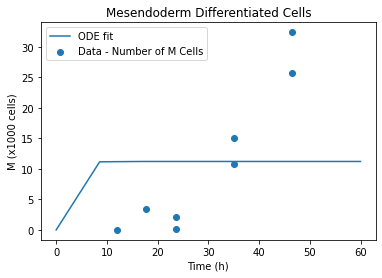

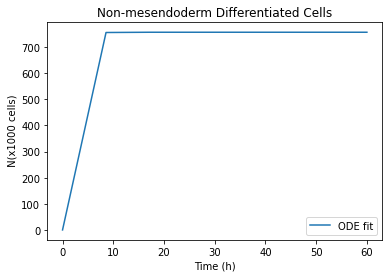

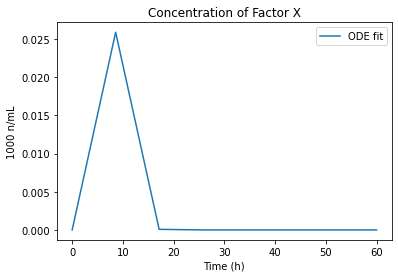

In [2]:
#constants 

C = 7.5
gamma = 8*96

def odes_2(x,t, d0,ac,ix, d_N, px, icx, e_x):
    
    N = x[0]
    M = x[1]
    X = x[2]
    
    a = (d0 + ac*C)/(1+ix*X)
    b = px /(1+icx*C)

    f = [a*(gamma-M-N), d_N*(gamma-M-N), b*(gamma-M-N)-e_x*X]
    return f

t_steps = np.linspace(0,60,8)

ic_3 = [0,0,0] # initial condition data

training_data = np.array(pd.read_csv('myData.csv',usecols=["M"]))
training_time = np.array(pd.read_csv('myData.csv',usecols=["Time"]))


def RMSE(params):
    d0, ac, ix, d_N, px, icx, e_x = params;
    ODE_output = odeint(odes_2, ic_3, t_steps, args = (d0,ac,ix, d_N, px, icx, e_x))
    err = training_data-ODE_output[:,0] 
    rmse = np.sqrt(np.sum(err**2))
    return  rmse

sol = minimize(RMSE, x0 = (1,1.4e-3,6,0.01,3,300,4.00e-7));

ODE_output = odeint(odes_2, ic_3, t_steps, args = tuple(sol['x']))

print(sol);

plt.figure(1)
plt.plot(t_steps, ODE_output[:,0], label = 'ODE fit')
plt.scatter(training_time, training_data, label = 'Data - Number of M Cells')
plt.xlabel('Time (h)')
plt.ylabel('M (x1000 cells)')
plt.title("Mesendoderm Differentiated Cells")
plt.legend()

plt.figure(2)
#plt.scatter(data['time'], data['c'], label = 'Data - Concentration of Nutrients')
plt.plot(t_steps, ODE_output[:,1], label = 'ODE fit')
plt.xlabel('Time (h)')
plt.ylabel(' N(x1000 cells)')
plt.title("Non-mesendoderm Differentiated Cells")
plt.legend()

plt.figure(3)
plt.plot(t_steps, ODE_output[:,2], label = 'ODE fit')
plt.xlabel('Time (h)')
plt.ylabel('1000 n/mL')
plt.title("Concentration of Factor X")
plt.legend()





## Bifurcation

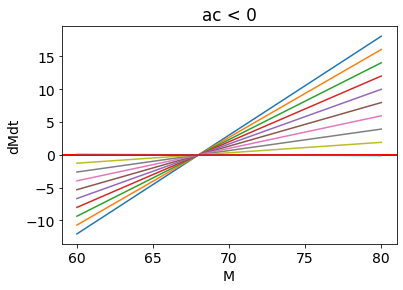

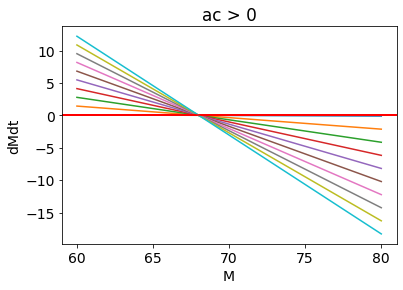

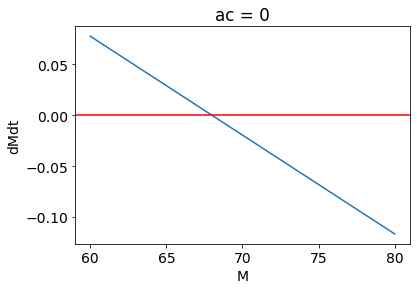

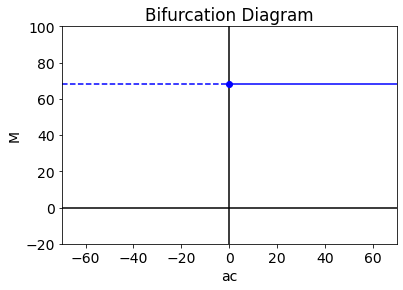

In [3]:
d0 = sol['x'][0] 
ix = sol['x'][2]
d_N = sol['x'][3]
b = sol['x'][4]
e_x = sol['x'][5]

N = 700 #use the steadystate value of N
X = 7.5




def dMdt(M,t,ac):
    
    a = (d0 + ac*C)/(1+ix*X)

    dMdt = a*(gamma-M-N)
    return dMdt

t =0

x_values = np.linspace(60,80,1000)

a_values = np.linspace(-10,0, 10)

for a in a_values: 

    dMdt_values = []
    for m in x_values:
        dMdt_values.append(dMdt(m,t,a))

    plt.figure(1)
    # Plot derivative vs y
    plt.rcParams.update({'font.size': 14})  # increase the font size
    plt.xlabel("M")
    plt.ylabel("dMdt")
    plt.title("ac < 0")
    plt.plot(x_values,dMdt_values);
    plt.axhline(0,color='red') # x = 0
    

a_values = np.linspace(0,10, 10)

for a in a_values: 

    dMdt_values = []
    for m in x_values:
        dMdt_values.append(dMdt(m,t,a))

    plt.figure(2)
    # Plot derivative vs y
    plt.rcParams.update({'font.size': 14})  # increase the font size
    plt.xlabel("M")
    plt.ylabel("dMdt")
    plt.title("ac > 0")
    plt.plot(x_values,dMdt_values);
    plt.axhline(0,color='red') # x = 0

dMdt_values = []
for m in x_values:
    dMdt_values.append(dMdt(m,t,0))

plt.figure(3)
# Plot derivative vs y
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("M")
plt.ylabel("dMdt")
plt.title("ac = 0")
plt.plot(x_values,dMdt_values);
plt.axhline(0,color='red') # x = 0

plt.figure(4)
plt.xlim(-70,70)
plt.ylim(-20, 100)
plt.axhline(0,color='black') 
plt.axvline(0, color = 'black') # x = 0
y1 = np.ones(1000)*68
x1 = np.linspace(-70,0, 1000)
x2 = np.linspace(0,70,1000)

plt.plot(x1, y1, linestyle="--", color = 'blue')
plt.plot(x2, y1, color = 'blue')

plt.xlabel("ac")
plt.ylabel("M")
plt.title("Bifurcation Diagram")

plt.plot(0,68,'bo') 


## Sensitivity Analysis 

### Local

11.21467916102277


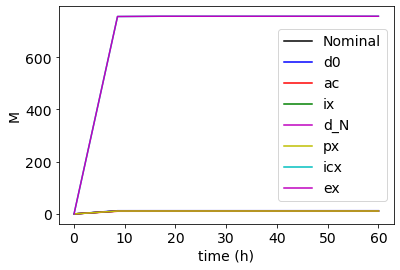

In [4]:
d0 = sol['x'][0] 
ac = sol['x'][1]
ix = sol['x'][2]
d_N = sol['x'][3]
px = sol['x'][4]
icx = sol['x'][5]
ex = sol['x'][6]

# Define a function which calculates the derivative

y = odeint(odes_2, ic_3, t_steps, args = (d0, ac, ix,d_N, px, icx, ex))
y1 = odeint(odes_2, ic_3, t_steps, args = (d0*1.01, ac, ix,d_N, px, icx, ex))
y2 = odeint(odes_2, ic_3, t_steps, args = (d0, ac*1.01, ix,d_N, px, icx, ex))
y3 = odeint(odes_2, ic_3, t_steps, args = (d0, ac, ix*1.01,d_N, px, icx, ex))
y4 = odeint(odes_2, ic_3, t_steps, args = (d0, ac, ix,d_N*1.01, px, icx, ex))
y5 = odeint(odes_2, ic_3, t_steps, args = (d0, ac, ix,d_N, px*1.01, icx, ex))
y6 = odeint(odes_2, ic_3, t_steps, args = (d0, ac, ix,d_N, px, icx*1.01, ex))
y7 = odeint(odes_2, ic_3, t_steps, args = (d0, ac, ix,d_N, px, icx, ex*1.01))

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time (h)")
plt.ylabel("M")
plt.plot(t_steps, y[:,0],'k', label = "Nominal");
plt.plot(t_steps, y1[:,0],'b', label = "d0");
plt.plot(t_steps, y2[:,0],'r', label = "ac");
plt.plot(t_steps, y3[:,0],'g', label = "ix");
plt.plot(t_steps, y4[:,0],'m', label = "d_N");
plt.plot(t_steps, y5[:,0],'y', label = "px");
plt.plot(t_steps, y6[:,1],'c', label = "icx");
plt.plot(t_steps, y7[:,1],'m', label = "ex");
plt.legend()

# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,0])

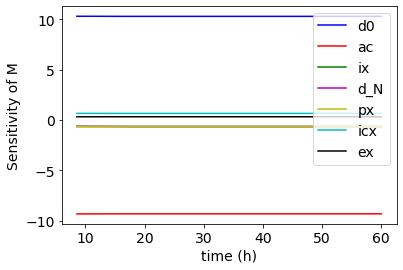

In [5]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time (h)")
plt.ylabel("Sensitivity of M")
np.seterr(invalid='ignore')
plt.plot(t_steps, ((y1[:,0] - y[:,0])/y[:,0])/0.01,'b', label = "d0");
plt.plot(t_steps, ((y2[:,0] - y[:,0])/y[:,0])/0.01,'r', label = "ac");
plt.plot(t_steps, ((y3[:,0] - y[:,0])/y[:,0])/0.01,'g', label = "ix");
plt.plot(t_steps, ((y4[:,0] - y[:,0])/y[:,0])/0.01,'m', label = "d_N");
plt.plot(t_steps, ((y5[:,0] - y[:,0])/y[:,0])/0.01,'y', label = "px");
plt.plot(t_steps, ((y6[:,0] - y[:,0])/y[:,0])/0.01,'c', label = "icx");
plt.plot(t_steps, ((y7[:,0] - y[:,0])/y[:,0])/0.01,'k', label = "ex");
plt.legend(loc='upper right')

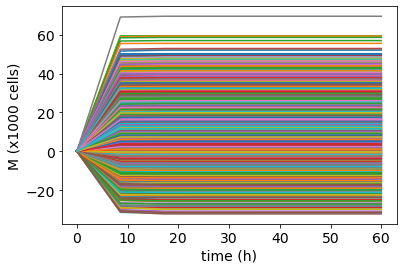

In [6]:
N = 1000;
d0 = np.random.uniform(d0*.8,d0*1.2,N);
ac = np.random.uniform(ac*.8,ac*1.2,N);
ix = np.random.uniform(ix*.8,ix*1.2,N);
d_N = np.random.uniform(d_N*.8,d_N*1.2,N);
px = np.random.uniform(px*.8,px*1.2,N);
icx = np.random.uniform(icx*.8,icx*1.2,N);
ex = np.random.uniform(ex*.8,ex*1.2,N);


P = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(odes_2, ic_3, t_steps, args = (d0[m], ac[m], ix[m],d_N[m], px[m], icx[m], ex[m]));
    plt.plot(t_steps,output[:,0]);
    plt.xlabel("time (h)");
    plt.ylabel("M (x1000 cells)");
    P[m]=output[-1,1];
    
    


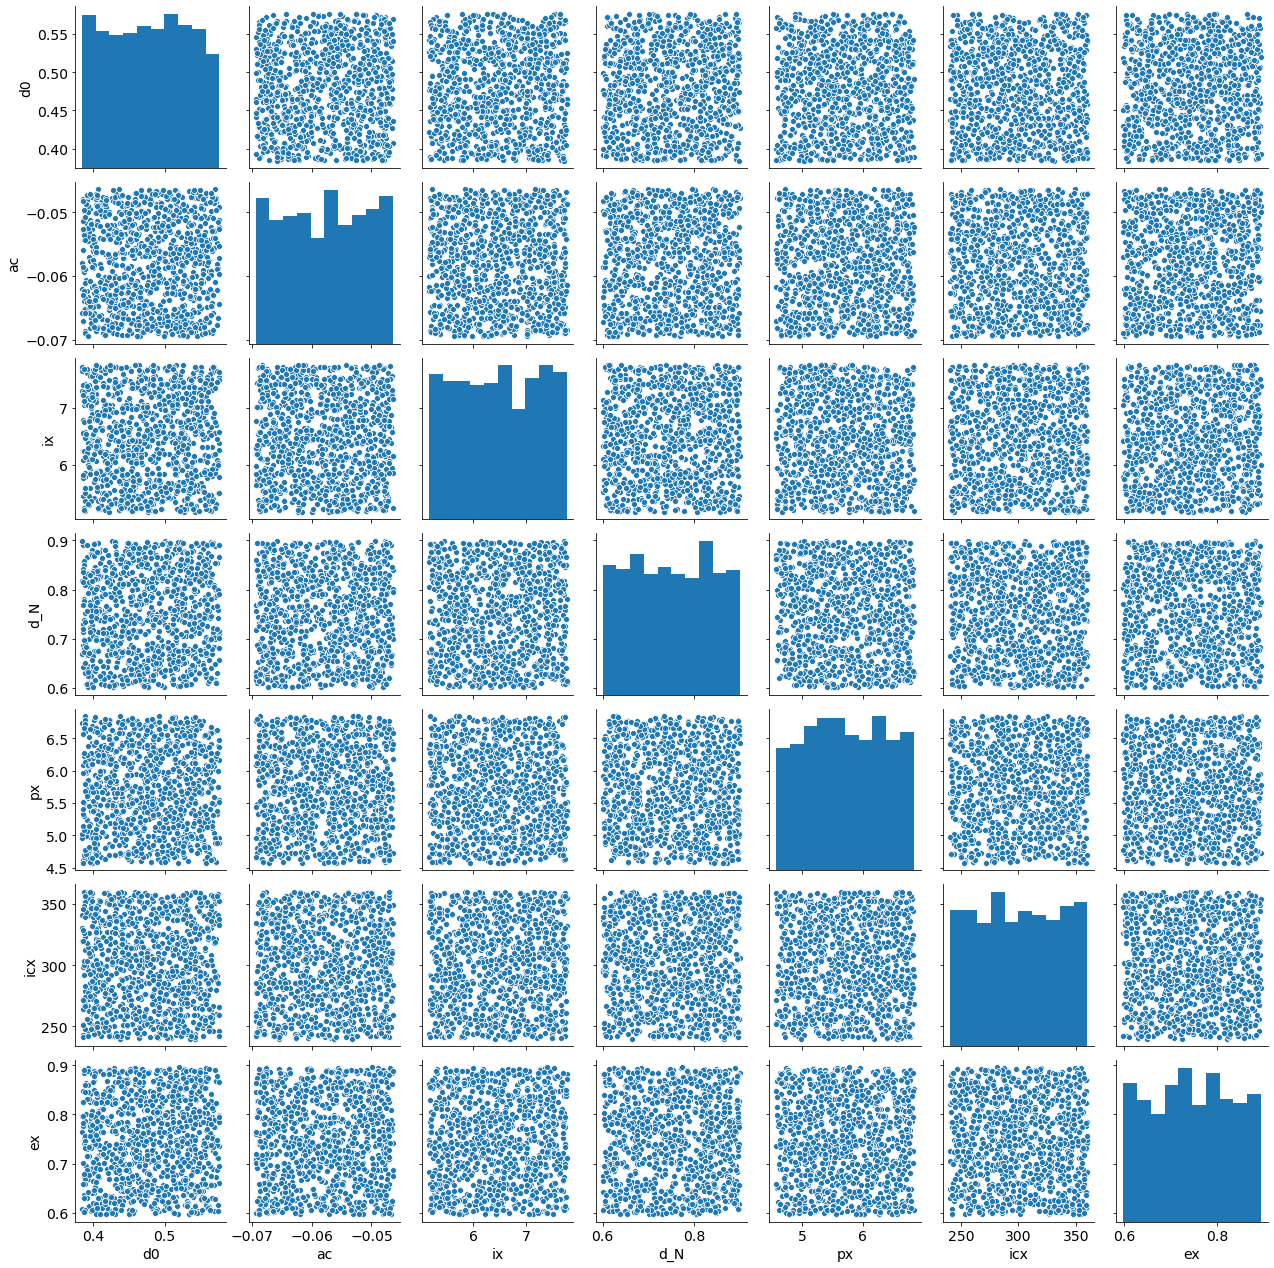

In [7]:
tmp = {'d0':d0, 'ac': ac, 'ix': ix, 'd_N': d_N, 'px':px, 'icx': icx, 'ex':ex};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)
20
plt.show()

Our fitted equn is y =  62.19145072933142 d0 +  -11.98845815440011 ac + 119.16195750168384 ix +  -14.068732589560426 d_N + -98.09521602502463 px + 26.478876861038778 icx + -77.41512499303691 ex


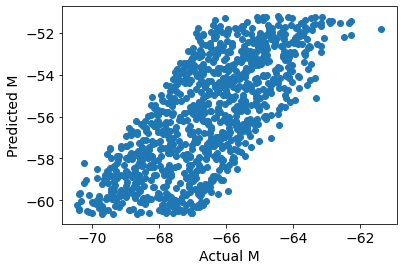

In [8]:
# Normalize y and parameter values
d0 = (sol['x'][0]- d0)/sol['x'][0]
ac = (sol['x'][1]- d0)/sol['x'][1]
ix = (sol['x'][2]- d0)/sol['x'][2]
d_N = (sol['x'][3]- d0)/sol['x'][3]
px = (sol['x'][4]- d0)/sol['x'][4]
icx = (sol['x'][5]- d0)/sol['x'][5]
ex = (sol['x'][6]- d0)/sol['x'][6]

y = (11.2-P)/11.2;


# Build our X. Normalize values
X = np.c_[d0, ac, ix, d_N, px, icx, ex]

# # Now can just do the linear least squares estimate
# #===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "d0 + ", params[1], "ac +", params[2],"ix + ", params[3], "d_N +", params[4], "px +", params[5], "icx +", params[6], "ex")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted M");
plt.xlabel("Actual M");
